<a href="https://colab.research.google.com/github/abdullahnizami77/Machine-Learningg/blob/main/housepricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction 

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
Data = pd.read_csv('kc_house_data.csv')


Intial Data Analysis

In [ ]:
Data.head(5).T


,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [ ]:
Data.tail(5).T


,21608,21609,21610,21611,21612
id,263000018,6600060120,1523300141,291310100,1523300157
date,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,360000,400000,402101,400000,325000
bedrooms,3,4,2,3,2
bathrooms,2.5,2.5,0.75,2.5,0.75
sqft_living,1530,2310,1020,1600,1020
sqft_lot,1131,5813,1350,2388,1076
floors,3,2,2,2,2
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [ ]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [ ]:

Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

DATA VISUALIZATION


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


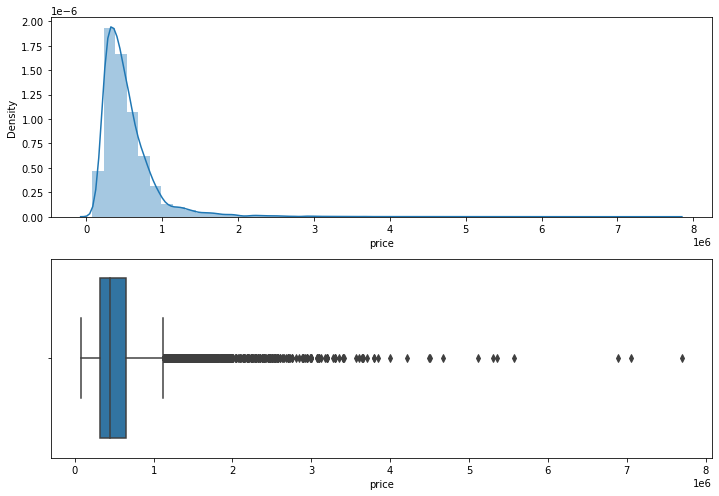

In [ ]:

fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

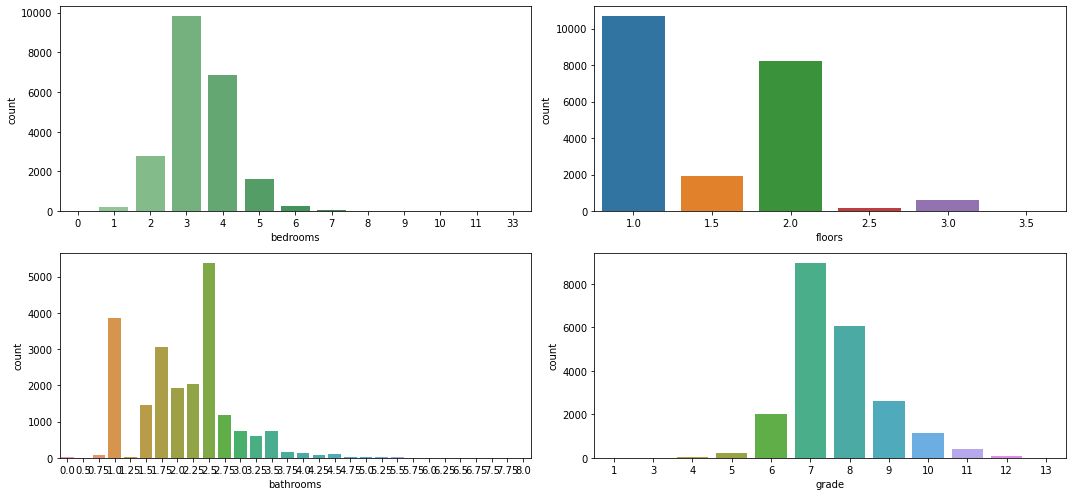

In [ ]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

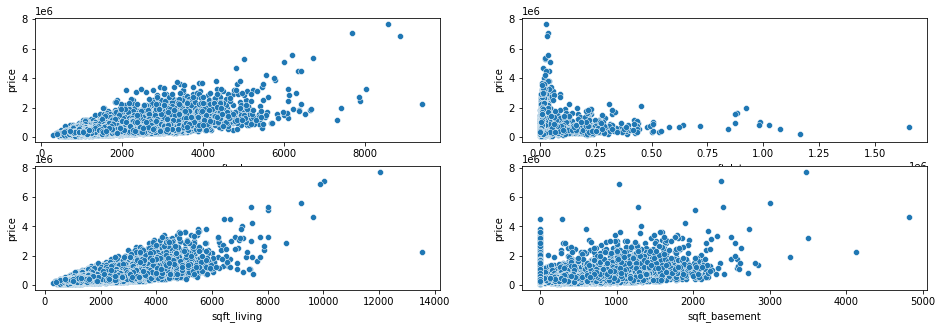

In [ ]:

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

In [ ]:

Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
Name: price, dtype: float64

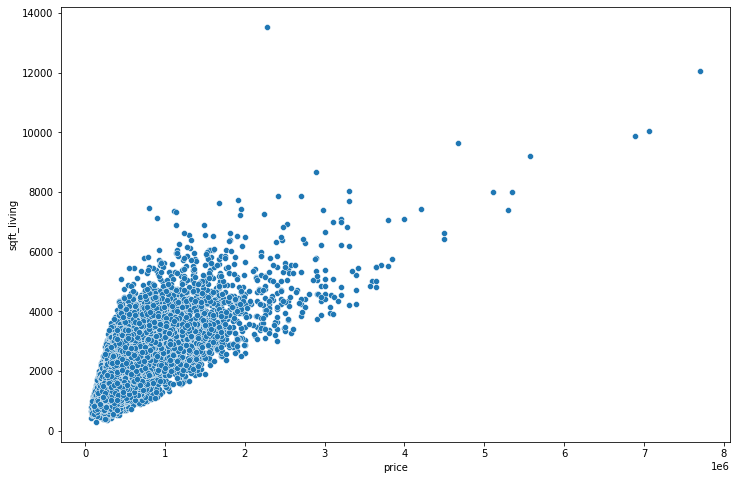

In [ ]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

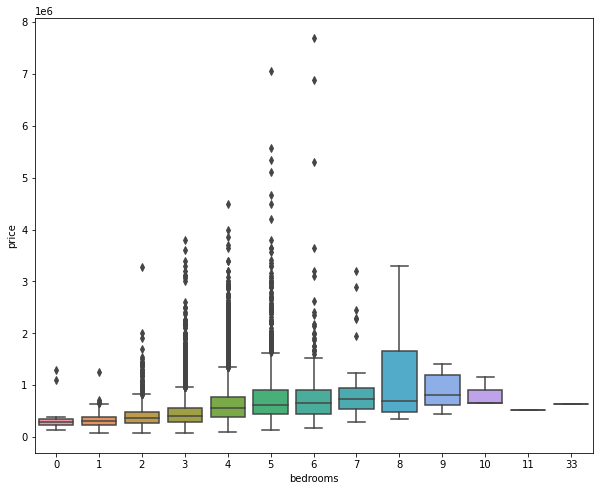

In [ ]:

plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

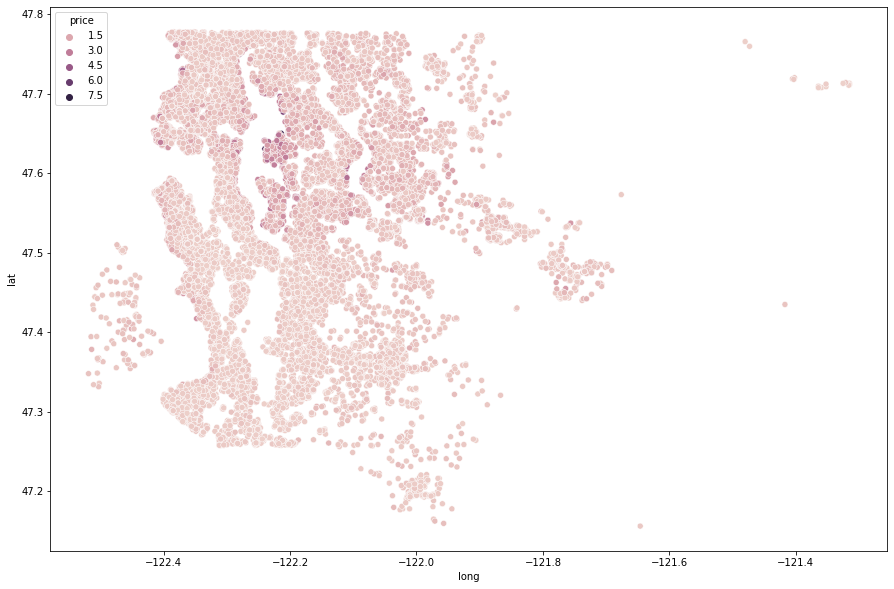

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=Data,hue='price')

In [ ]:

non_top_1_perc = Data.sort_values('price',ascending = False).iloc[216:]


In [ ]:
len(Data)*0.01

216.13

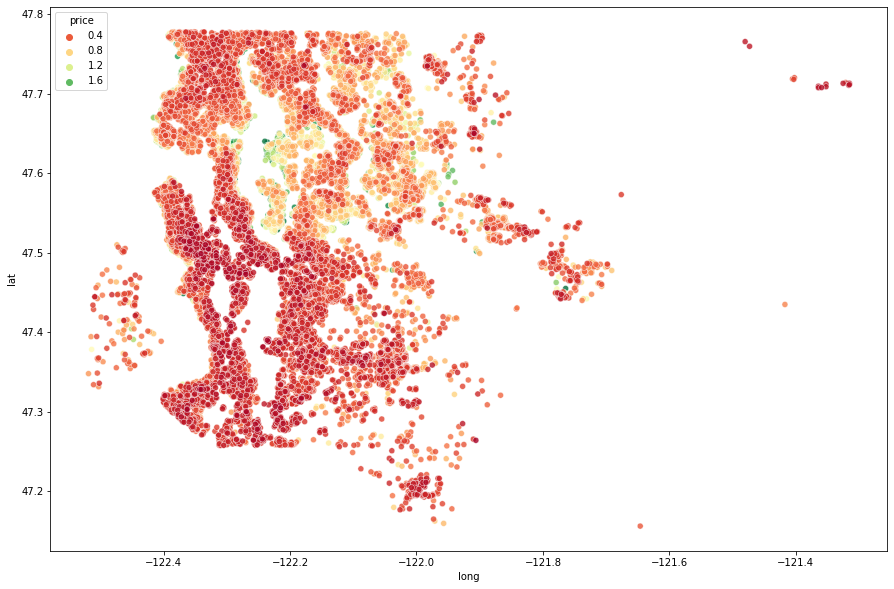

In [ ]:

plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,alpha = 0.8,palette = 'RdYlGn', hue='price')


In [ ]:

Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


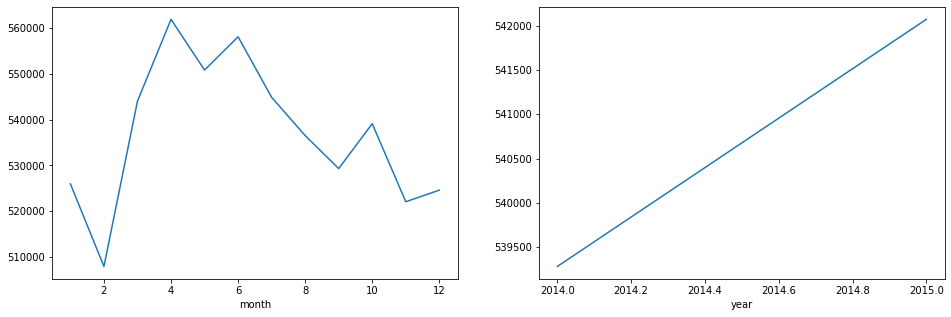

In [ ]:

fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [ ]:
Data = Data.drop('date',axis=1)

Train and Test data Split


In [ ]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


regressor.intercept_
regressor.coef_

array([-32194.0457576 ,  28334.52140218,  80995.6993481 ,   6414.39239253,
         3419.09014292,  49952.16437833,  36888.8946902 ,  21925.57743345,
       116130.35793686,  76107.34540861,  25384.73702862, -73060.62345521,
         7668.50456155,  78068.59035791, -17286.57950122,  18903.78741591,
       -10288.86669109,   4190.90765059,  17087.81217731])

In [ ]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,349950.0,530708.044578
1,450000.0,667170.683936
2,635000.0,553264.867180
3,355500.0,346623.228418
4,246950.0,61187.195736
5,406550.0,481129.982906
6,350000.0,312696.357900
7,226500.0,273842.646286
8,265000.0,280530.765158
9,656000.0,532925.015171


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


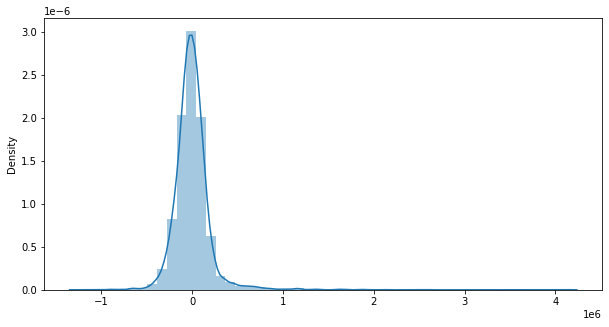

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 126028.20
Mean Squared Error:40658017783.49
Root Mean Squared Error:201638.33
Variance score is: 0.70


In [ ]:

Data['price'].mean()

540182.1587933188

In [ ]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.69
Test Score 0.70


# Method2: Keras Regression

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

using 4 hidden layers and 1 output layers 




In [ ]:


model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 1s 4ms/step - loss: 425533702144.0000 - val_loss: 429124190208.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 424429420544.0000 - val_loss: 424769421312.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 404753809408.0000 - val_loss: 375396401152.0000
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 301118685184.0000 - val_loss: 205077086208.0000
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 129200766976.0000 - val_loss: 75042390016.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 71871537152.0000 - val_loss: 63397650432.0000
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 64794075136.0000 - val_loss: 58899750912.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 60364922880.0000 - val_loss: 55311462400.0000
Epoch 9/400
114/114 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


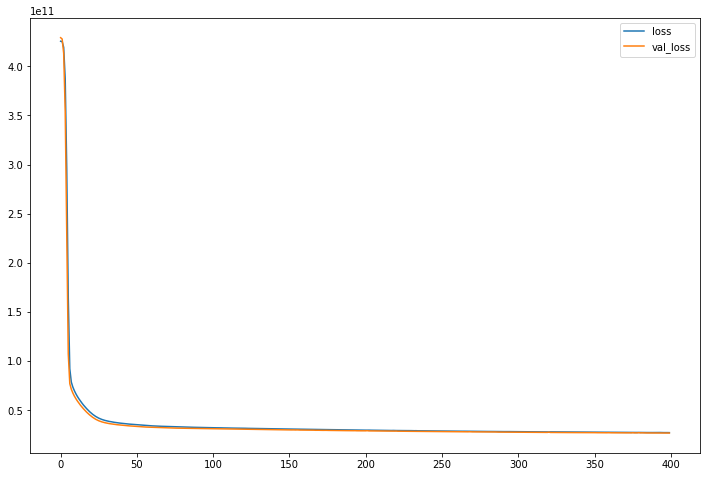

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


# Evaluation on Test Data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 101626.76
Mean Squared Error: 26830170128.85
Root Mean Squared Error: 163799.18
Variance score is: 0.80


In [ ]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

540182.1587933188

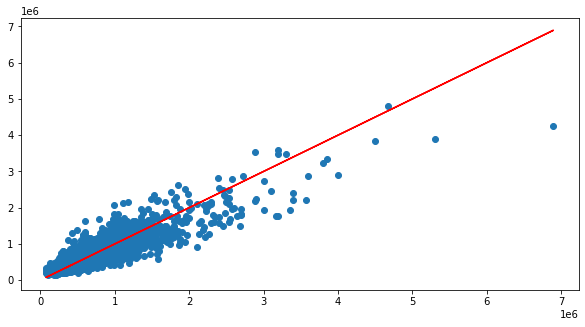

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

KeyboardInterrupt: ignored

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f33043903b0>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


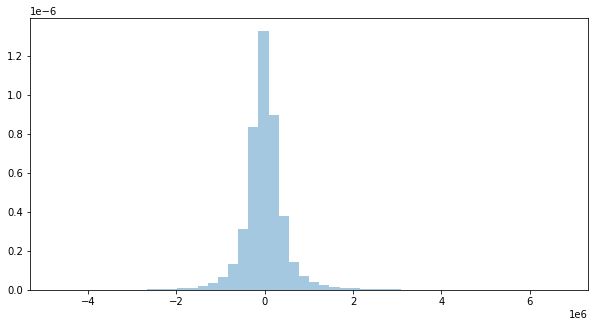

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Hoe we can use the model!

In [ ]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [ ]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
# apply model on those featurs
model.predict(single_house)

array([[264384.56]], dtype=float32)

In [ ]:
# compare the prediction with real price for the first column
Data['price'][0]

221900.0

# Multiple Linear Regression vs Keras Regression

In [ ]:

print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 101626.76
Mean Squared Error(MSE): 26830170128.85
Root Mean Squared Error(RMSE): 163799.18
Variance score: 80.46

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 126028.20
Mean Squared Error(MSE):40658017783.49
Root Mean Squared Error(RMSE):201638.33
Variance score: 70.40
